## Sixth Assignment
Lorenzo Domenichetti 2011653

due 23-05

In [1]:
library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'gridExtra' was built under R version 4.0.5"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'lattice' was built under R version 4.0.5"


### Exercise 1

• the number of particles emitted by a radioactive source during a fixed interval of time (∆t =
10 s) follows a Poisson distribution on the parameter µ. The number of particles observed during
consecutive time intervals is: 4, 1, 3, 1 and 3

(a) suppose a uniform prior distribution for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R


R mean:2.59999999903502

R variance:0.51999999266128

R median:2.53

Analytical mean:2.6

Analytical variance:0.52

Analytical median:2.53364581174773



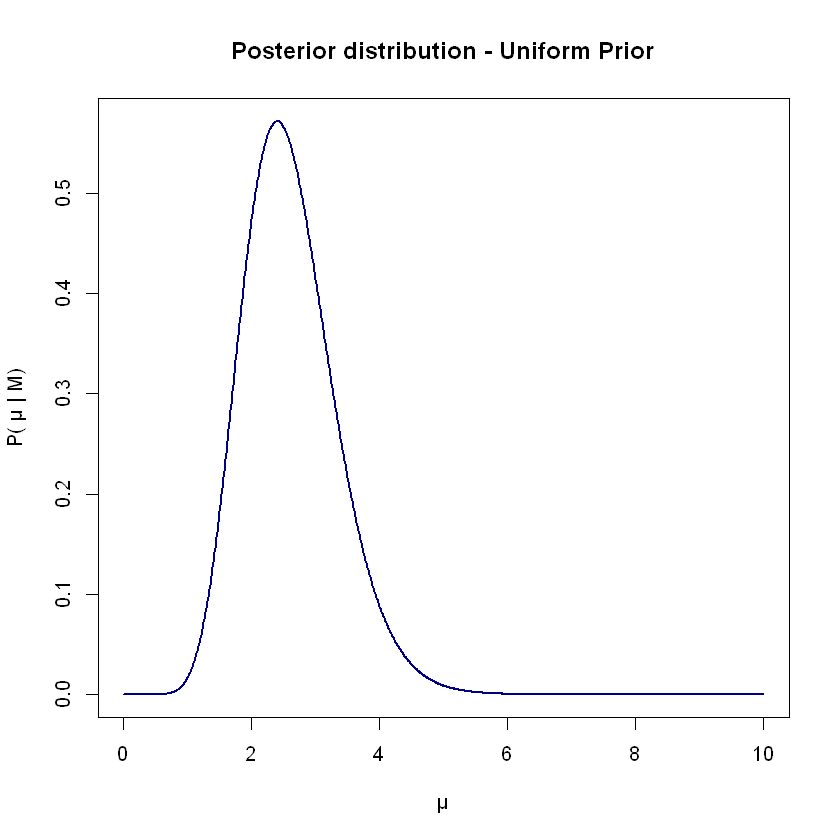

In [2]:
results <- c(4, 1, 3, 1, 3)

means <- seq(0,10, 0.01)
unif_prior <- 1
vecr <- dgamma(means, sum(results)+1,length(results))
plot(means, vecr, lwd = 2, col = 'navy', t = 'l', xlab = "µ", ylab = "P( µ | M)", main = "Posterior distribution - Uniform Prior")

vecrn <- vecr/sum(vecr)
cms <- cumsum(vecrn)
index.median = 0
for(i in cms){
    if(i > 0.5){
        index.median = i
        break
    }
}
mean.unif <- sum(vecr*means)/sum(vecr)
var.unif  <- (sum(results)+1)/length(results)^2

message("R mean:", sum(vecr*means)/sum(vecr))
message("R variance:", sum(means^2*vecrn)-sum(means*vecrn)^2)
message("R median:", means[match(index.median, cms)])


message("Analytical mean:", (sum(results)+1)/length(results))
message("Analytical variance:", (sum(results)+1)/length(results)^2)
message("Analytical median:", qgamma(0.5, sum(results)+1,length(results)))

(b) suppose a Jeffrey’s prior for the parameter µ
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

R mean:2.49999999952243

R variance:0.499999996320297

R median:2.43

Analytical mean:2.5

Analytical variance:0.5

Analytical median:2.43365866978843



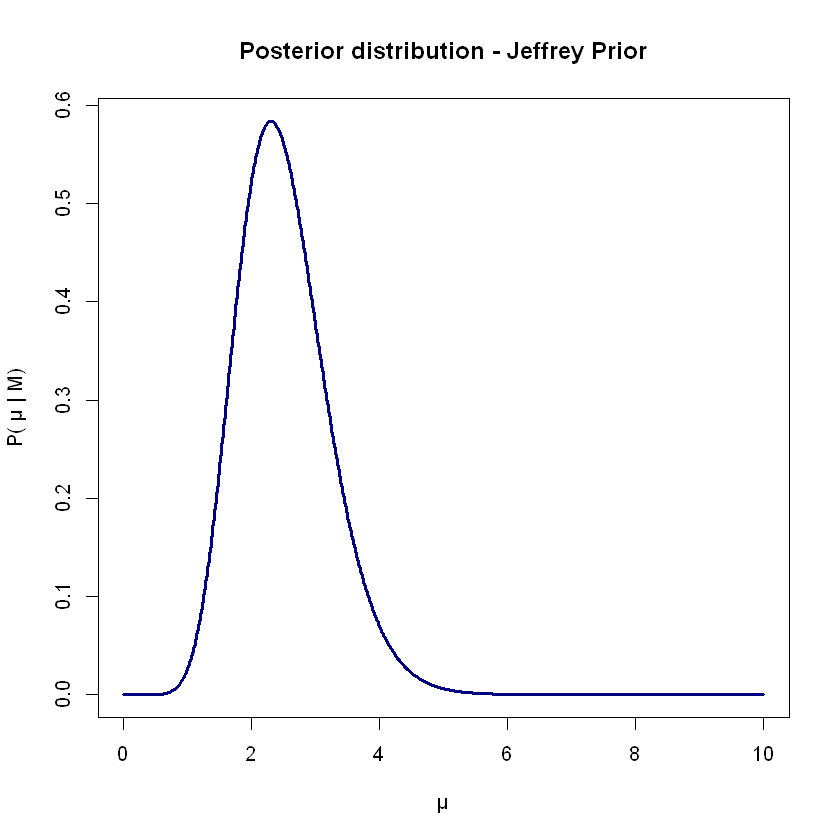

In [3]:
vecr.jeff <- dgamma(means, sum(results)+0.5,length(results))
plot(means, vecr.jeff, lwd = 3, col = 'navy', t = 'l', xlab = "µ", ylab = "P( µ | M)", main = "Posterior distribution - Jeffrey Prior")


vecr.jeffn <- vecr.jeff/sum(vecr.jeff)
cms <- cumsum(vecr.jeffn)
index.median = 0
for(i in cms){
    if(i > 0.5){
        index.median = i
        break
    }
}
mean.jeff <- sum(vecr.jeff*means)/sum(vecr.jeff)

message("R mean:", sum(vecr.jeff*means)/sum(vecr.jeff))
message("R variance:", sum(means^2*vecr.jeffn)-sum(means*vecr.jeffn)^2)
message("R median:", means[match(index.median, cms)])


message("Analytical mean:", (sum(results)+0.5)/length(results))
message("Analytical variance:", (sum(results)+0.5)/length(results)^2)
message("Analytical median:", qgamma(0.5, sum(results)+0.5,length(results)))

(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation

In [4]:
moves = seq(0.001,3,0.01)

shape.unif = sum(results)+1
rate.unif = length(results)
message("95% CI for Unif Prior            - [", qgamma(0.025,shape.unif, rate.unif) , ", ", qgamma(0.975,shape.unif, rate.unif), "]")


shape.jeff = sum(results)+0.5
rate.jeff = length(results)
message("95% CI for Jeff Prior            - [", qgamma(0.025,shape.jeff, rate.jeff) , ", ", qgamma(0.975,shape.jeff, rate.jeff), "]")


message("95% CI for Gaussian Posterior    - [", qnorm(0.025, mean.unif, sqrt(var.unif)), " , " , qnorm(0.975, mean.unif, sqrt(var.unif)), "]")

95% CI for Unif Prior            - [1.38439049820076, 4.19231700963539]

95% CI for Jeff Prior            - [1.31197200249378, 4.06464691202752]

95% CI for Gaussian Posterior    - [1.18664987017064 , 4.01335012789939]



### Exercise 2
• given the problem of the lightouse discussed last week, study the case in which both the position
along the shore (α) and the distance out at sea (β) are unknown
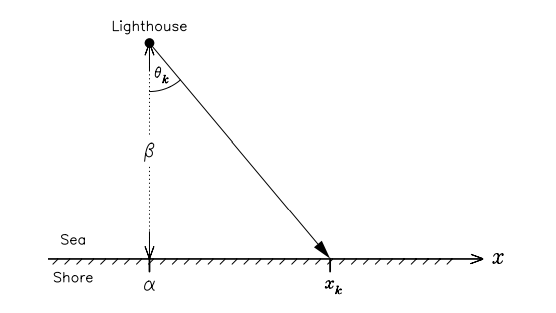


In [5]:
likelihood <- function(res, a, b){
    vec <- unlist(lapply(res, function(x){
        1/pi * b/(b^2+(x-a)^2)*1/(0.2^2)
        }))
    return(prod(vec))
}

set.seed(23578971)
theta = runif(500, -pi/2, pi/2)

alpha = 1
beta = 2

xs = alpha + beta*tan(theta)

toTest <- expand.grid(
    alpha = seq(-5, 5, by = 0.1), 
    beta = seq(0, 5, by = 0.1))

ml10 <- apply(toTest, 1, function(x){
  likelihood(xs[1:10], x[1], x[2])
})

ml50 <- apply(toTest, 1, function(x){
  likelihood(xs[1:50], x[1], x[2])
})


ml100 <- apply(toTest, 1, function(x){
  likelihood(xs[1:100], x[1], x[2])
})

ml500 <- apply(toTest, 1, function(x){
  likelihood(xs, x[1], x[2])
})

ml10 = ml10*100/sum(ml10)
ml50 = ml50*100/sum(ml50)
ml100 = ml100*100/sum(ml100)
ml500 = ml500*100/sum(ml500)


FINALE10  = cbind(toTest, ml10 )
FINALE50  = cbind(toTest, ml50 )
FINALE100 = cbind(toTest, ml100)
FINALE500 = cbind(toTest, ml500)

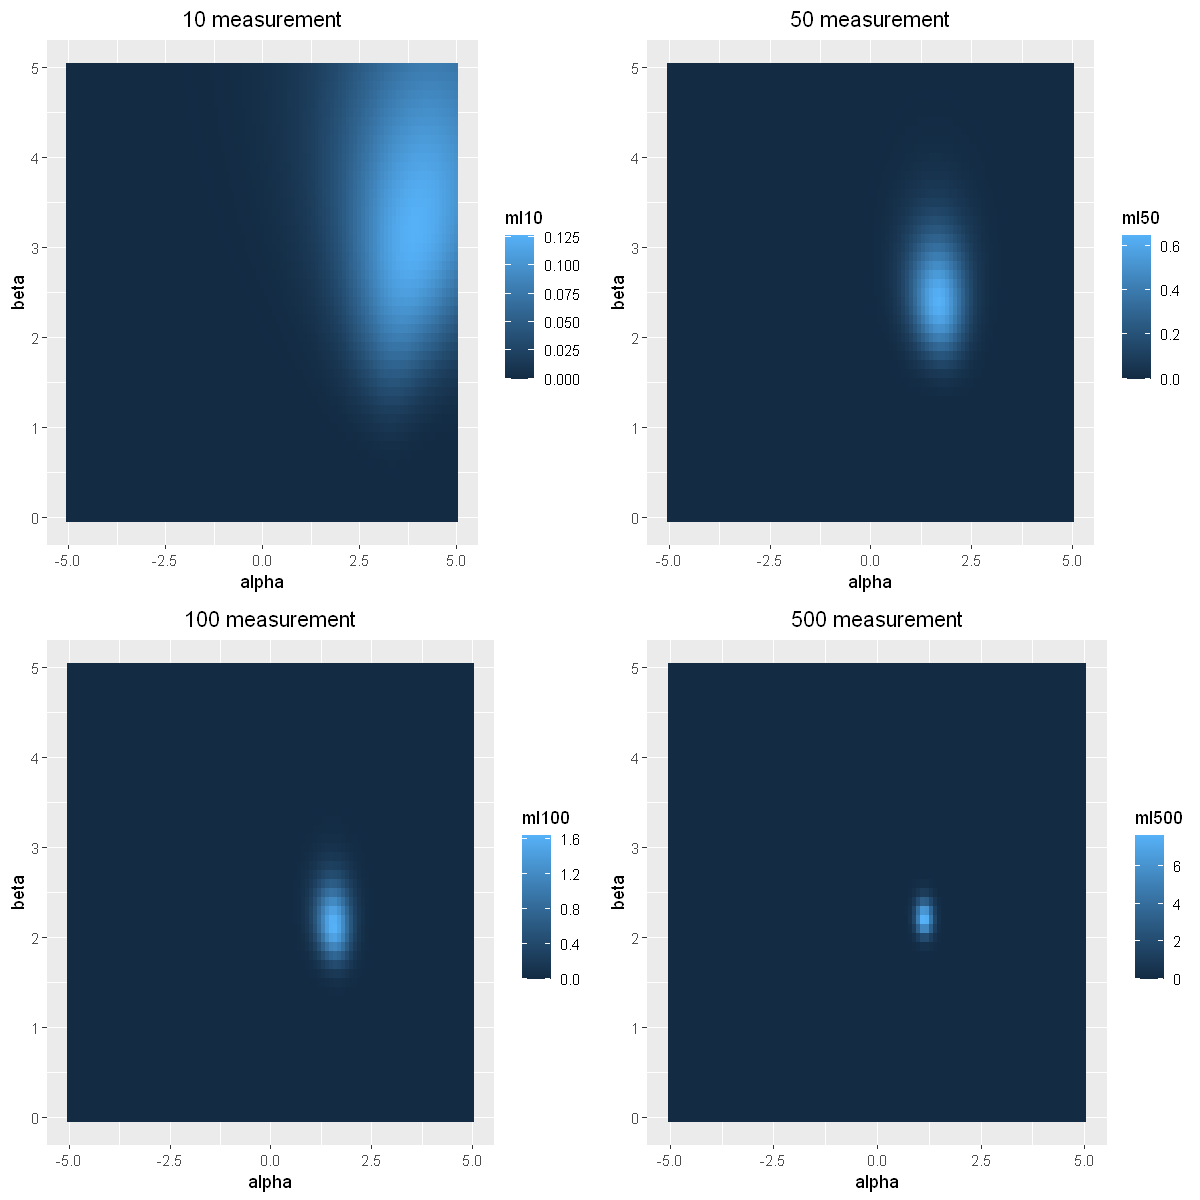

In [6]:
p1 <- complete(FINALE10, alpha, nesting(beta), fill = list(ml10 = 0)) %>% 
ggplot(aes(x = alpha, y = beta, fill = ml10)) + labs(title= "10 measurement") + 
geom_tile() + theme(plot.title = element_text(hjust = 0.5))
p2 <- complete(FINALE50, alpha, nesting(beta), fill = list(ml50 = 0)) %>% 
ggplot(aes(x = alpha, y = beta, fill = ml50)) + labs(title= "50 measurement") + 
geom_tile() + theme(plot.title = element_text(hjust = 0.5))
p3 <- complete(FINALE100, alpha, nesting(beta), fill = list(ml100 = 0)) %>% 
ggplot(aes(x = alpha, y = beta, fill = ml100)) +labs(title= "100 measurement") + 
geom_tile() + theme(plot.title = element_text(hjust = 0.5))
p4 <- complete(FINALE500, alpha, nesting(beta), fill = list(ml500 = 0)) %>% 
ggplot(aes(x = alpha, y = beta, fill = ml500)) + labs(title= "500 measurement") + 
geom_tile()  + theme(plot.title = element_text(hjust = 0.5))
options(repr.plot.width=10, repr.plot.height=10)

grid.arrange(p1,p2,p3,p4,  ncol = 2, nrow = 2)

### Exercise 3

• given the Signal over Background example discussed last week, analyze and discuss the following
cases:

(a) vary the sampling resolution of used to generate the data, keeping the same sampling range  
```xdat <- seq(from=-7*w, to=7*w, by=0.5*w)```

• change the resolution w = {0.1, 0.25, 0.5, 1, 2, 3}

• Check the effect on the results

(b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)

• Check the effect on the results

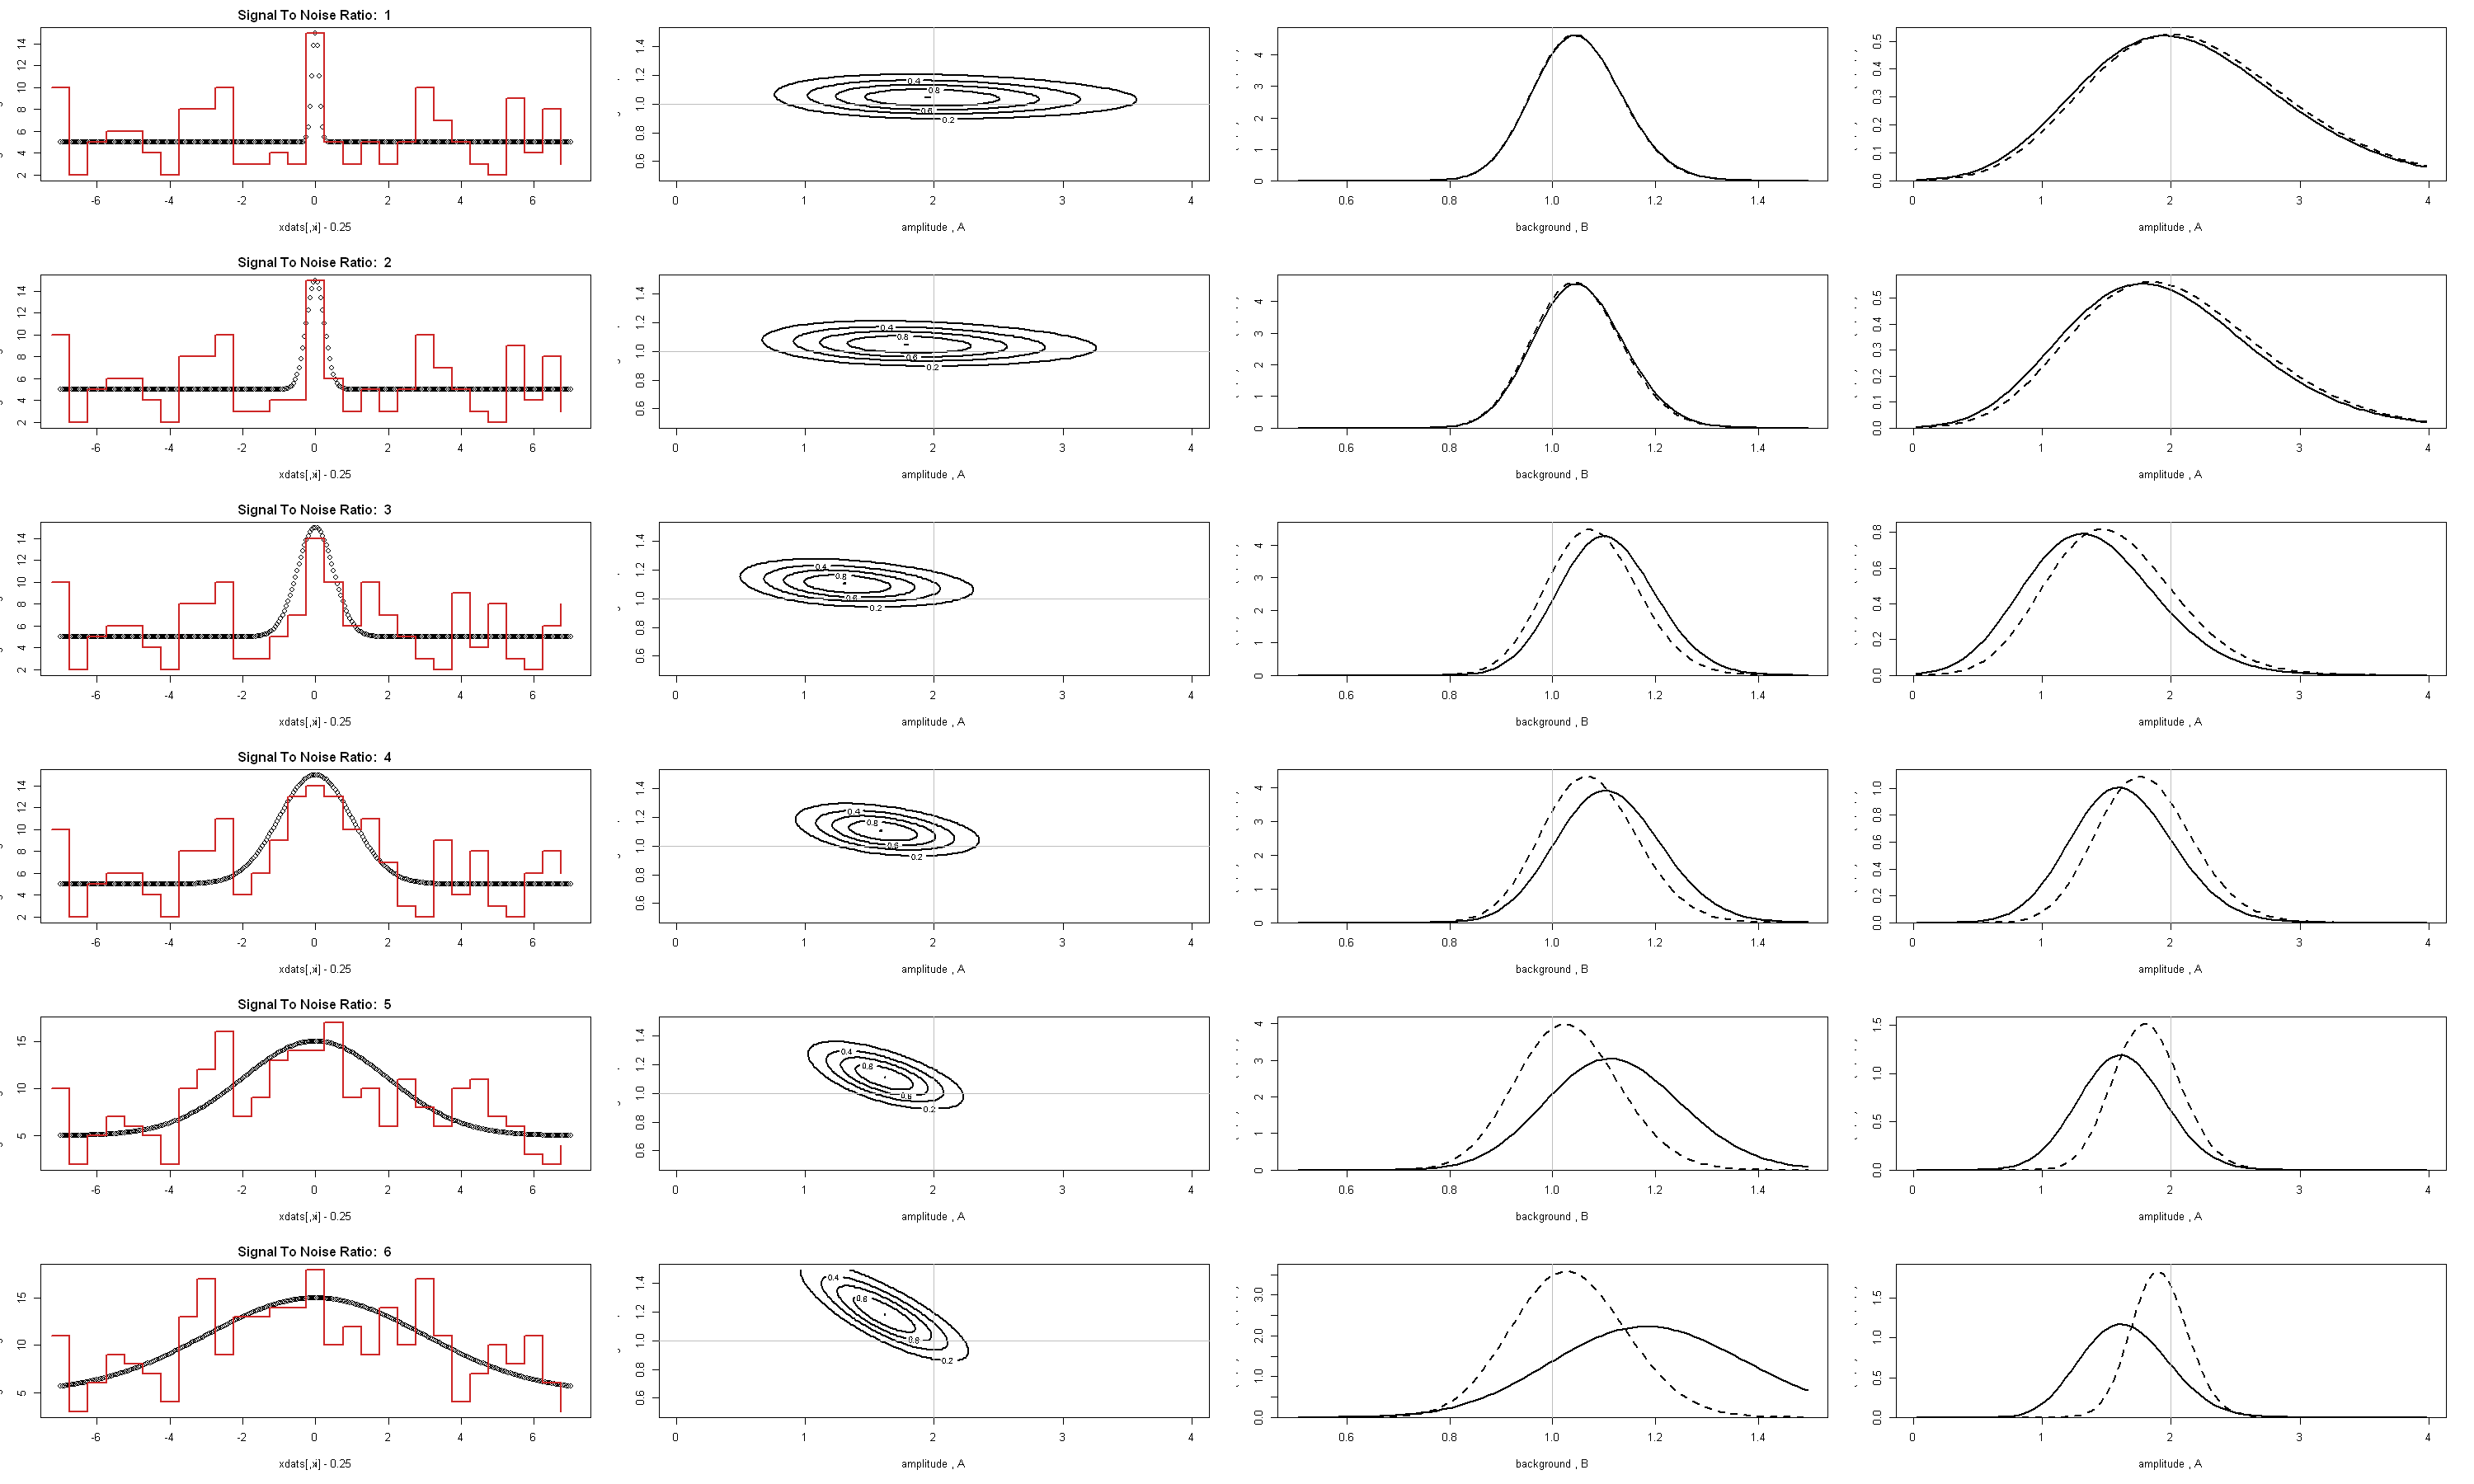

In [7]:
# - Sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim )/ Nsamp
delta_b <- diff(blim )/ Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid

# - Generative model
signal <- function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
} 

log.post <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf )} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

defaultW <- getOption("warn")
options(warn = -1)
# Define model parameters
x0 <- 0 # Signal peak
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
ws <- c(0.1, 0.25, 0.5, 1, 2, 3)

xdats <- matrix(NA, nrow=29, ncol=0)
xplots <- matrix(NA, nrow=281, ncol=0)
splots <- matrix(NA, nrow=281, ncol=0)
ddats <- matrix(NA, nrow=29, ncol=0)
res <- c()

for(w in ws){
    set.seed(205)
    xdat <- seq(from=-7, to=7, by=0.5)
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05)
    splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
    
    xdats <- cbind(xdats, xdat)
    ddats <- cbind(ddats, ddat)
    xplots <-cbind(xplots, xplot)
    splots <-cbind(splots, splot)
}


par(mfrow = c(6,4), mar=c(5,3,2,2)+0.1)
options(repr.plot.width=25, repr.plot.height=15)


titles = c("1", "2", "3", "4", "5", "6")

for(i in 1:6){
    plot(xplots[,i] , splots[,i],  main = paste("Signal To Noise Ratio: ", titles[i]),
         xlab="x", ylab="Signal+Background counts",xlim=c(min( xdats[,i]) , max( xdats[,i])),  ylim=c(min( ddats[,i],  splots[,i]) , max( ddats[,i],  splots[,i])))
    par(new=TRUE)
    plot(xdats[,i]-0.25, ddats[,i] , type='s',col='firebrick3', ylab = "",
         lwd=2,xlim=c(min( xdats[,i]) , max( xdats[,i])), ylim=c(min( ddats[,i],  splots[,i]) , max( ddats[,i],  splots[,i])))

    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddats[,i] , xdats[,i] , a[j], b[k], x0, ws[i], Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    contour(a, b, exp(z),
        nlevels = 5,
        labcex = 0.5,
        lwd = 2,
        xlab="amplitude , A",
        ylab="background , B")
    abline(v=2,h=1,col="grey")
    
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))

    p_a_bD <- exp( Vectorize (log.post , "a")(ddats[,i] , xdats[,i] , a, B.true , x0, ws[i], Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")(ddats[,i] , xdats[,i] , A.true , b,  x0, ws[i], Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))

    plot(b, p_b_D, xlab="background , B", yaxs="i", ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)",
         type="l", lwd=2)
    lines(b, p_b_aD , lwd=2, lty=2)
    abline(v=B.true , col="grey")
    plot(a, p_a_D, xlab="amplitude , A", yaxs="i", ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)",
         type="l", lwd=2)
    lines(a, p_a_bD , lwd=2, lty=2)
    abline(v=A.true , col="grey")

}

Changing the resolution drastically affects the signal and noise identification. 

A nice recognition is reached in the case of small resolutions, while on the other hand both A and B  have a more inaccurate posterior distribution as the resolution worsen. 

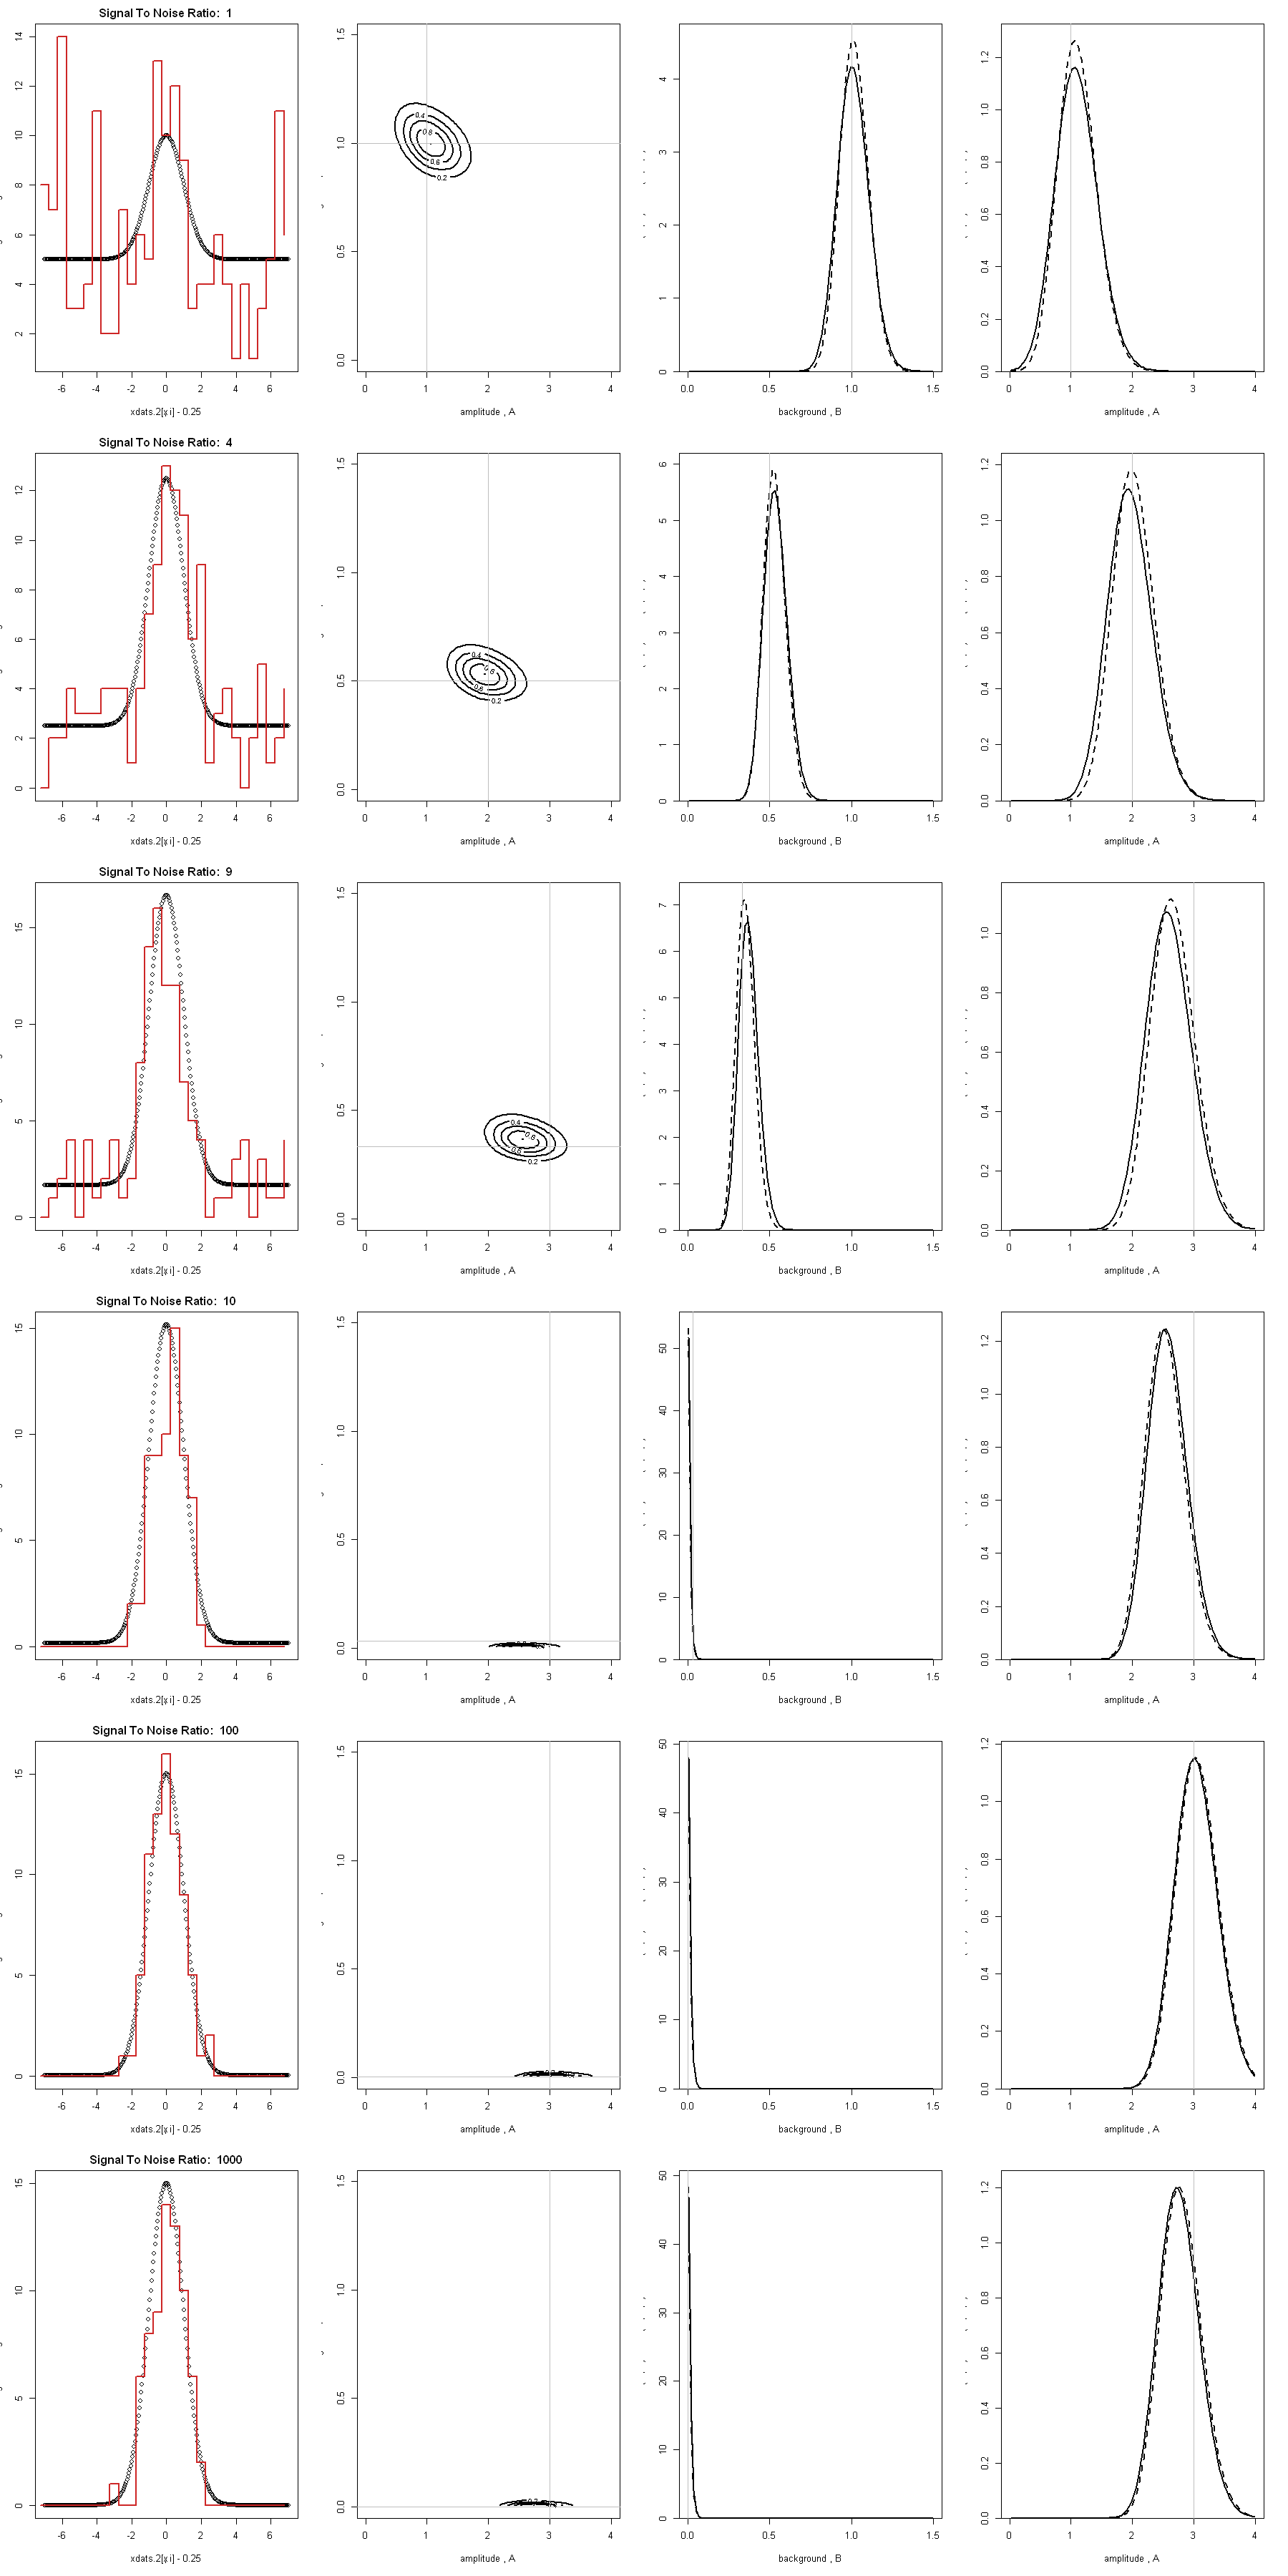

In [9]:
As <- c(1,2,3,3, 3, 3)
Bs <- c(1,1/2, 1/3, 1/30, 1/300, 1/3000)
w <- 1

xdats.2 <- matrix(NA, nrow=29, ncol=0)
xplots.2 <- matrix(NA, nrow=281, ncol=0)
splots.2 <- matrix(NA, nrow=281, ncol=0)
ddats.2 <- matrix(NA, nrow=29, ncol=0)
res.2 <- c()
for(i in 1:6){ 

    # - Generate the observed data
    #set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat , As[i] , Bs[i] , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , As[i] , Bs[i]  , x0, w, Delta.t)
    
    xdats.2 <- cbind(xdats.2, xdat)
    ddats.2 <- cbind(ddats.2, ddat)
    xplots.2 <-cbind(xplots.2, xplot)
    splots.2 <-cbind(splots.2, splot)
    
}

options(repr.plot.width=25, repr.plot.height=15)


# - Sampling grid for computing posterior
alim <- c(0.0, 4)
blim <- c(0., 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim )/ Nsamp
delta_b <- diff(blim )/ Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid
# Define model parameters


options(repr.plot.width=15, repr.plot.height=30)
par(mfrow = c(6,4), mar=c(5,3,2,2)+0.1)

titles = c("1", "4", "9", "10", "100", "1000")
for(i in 1:6){


    plot(xplots.2[,i] , splots.2[,i], main = paste("Signal To Noise Ratio: ", titles[i]),
         xlab="x", ylab="Signal+Background counts",xlim=c(min( xdats.2[,i]) , max( xdats.2[,i])),  ylim=c(min( ddats.2[,i],  splots.2[,i]) , max( ddats.2[,i],  splots.2[,i])))
    par(new=TRUE)
    plot(xdats.2[,i]-0.25, ddats.2[,i] , type='s',col='firebrick3', ylab = "",
         lwd=2,xlim=c(min( xdats.2[,i]) , max( xdats.2[,i])), ylim=c(min( ddats.2[,i],  splots.2[,i]) , max( ddats.2[,i],  splots.2[,i])))

    
    z <- matrix(data=NA , nrow=length(a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddats.2[,i] , xdats.2[,i] , a[j], b[k], x0, w, Delta.t)
        }
    }
    z <- z - max(z) # set maximum to zero
    # Plot unnormalized 2D posterior as contours.
    contour(a, b, exp(z),
        nlevels = 5,
        labcex = 0.5,
        lwd = 2,
        xlab="amplitude , A",
        ylab="background , B")
    abline(v=As[i],h=Bs[i],col="grey")
    
    
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))

    p_a_bD <- exp( Vectorize (log.post , "a")(ddats.2[,i] , xdats.2[,i] , a, Bs[i] , x0, 1, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")(ddats.2[,i] , xdats.2[,i] , As[i] , b,  x0, 1, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))

    plot(b, p_b_D, xlab="background , B", yaxs="i", ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)",
         type="l", lwd=2)
    lines(b, p_b_aD , lwd=2, lty=2)
    abline(v=Bs[i] , col="grey")
    plot(a, p_a_D, xlab="amplitude , A", yaxs="i", ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)",
         type="l", lwd=2)
    lines(a, p_a_bD , lwd=2, lty=2)
    abline(v=As[i] , col="grey")
}



One can notice the different behaviour of the algorithm when different signal to noise ratios are considered.

In the first row, the signal (A) is not well identified, while on the other hand the background has a correct shape. 

Increasing the signal amplitude A translates into a better identification. 

